In [2]:
import tensorflow as tf
from PIL import Image

In [3]:
model=tf.keras.models.load_model("cifar.h5")
classes=[
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "sheep",
    "truck"
]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 9)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 36)         0

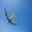

In [6]:
img=Image.open("img.jpeg")
img=img.resize((32,32))
img

In [8]:
test=tf.reshape(tf.constant(img)/255,(-1,32,32,3))
preds=model.predict(test,verbose=False)[0]*100
preds=tf.math.round(preds)
print(preds)

tf.Tensor([96.  0.  1.  0.  0.  0.  0.  0.  2.  0.], shape=(10,), dtype=float32)


In [10]:
accuracy=tf.reduce_max(preds)
index=int(tf.where(preds==accuracy)[0][0])
print(index)
pred=classes[index]
pred

0


'airplane'

In [11]:
print(pred.title(),int(accuracy),"%")

Airplane 96 %
